# Coarse-Graining Neural Data: April 18, 2019

Experiment             |  Data
:-------------------------:|:-------------------------:
<img src="20190422_140518-ANIMATION.gif" width="550" height="700" alt="">  Experiment recording firing "spikes" from 1000+ live neurons|  <img src="raster_plot.png" width="360" height="270" alt=""> Rows represent neurons, column different moments in time.

## Which components carry the majority of the information about this system?

* ### All of them?
* ### A few important ones?

### However...
## One can't expect to measure the activity of each individual neuron in the brain.

### _Dimensionality Reduction_, but not just because data is big:

* ### Impossible to observe every unit anyway
* ### Brain function better described in terms of higher-order structures?

### Then, _reconstruction_ -- not of the original data, but of certain key statistics that matter.


## Interface of Physics + Machine Learning

<img src="s1s2sigma.png" width="400" height="300" alt="">

### One pair at a time, find the most highly correlated units; add, connect, and replace them with a new hidden unit.
### Instead of Contrastive Divergence, solve the for the couplings analytically:

Let $J_0$ be a bias on the hidden spin $\sigma$, and $J_1$ and $J_2$ the strengths with which spins $s_1$ and $s_2$ are coupled to $\sigma$, respectively. The joint distribution is:

\begin{equation}
P\left(s_1,s_2,\sigma\right) = \frac{1}{Z} e^{(J_0 + J_1 s_1 + J_2 s_2)\sigma}; \mbox{  } \lbrace s_1, s_2, \sigma \rbrace=\lbrace \pm 1 \rbrace
\end{equation}

It can be shown, by taking expectations explicitly, that this problem can be written as three coupled equations in three unknowns.

\begin{align*}
    \langle s_1 \rangle &= \tanh{(J_0)}\tanh{(J_1)}  \\    
    \langle s_2 \rangle &= \tanh{(J_0)}\tanh{(J_2)}  \\
    \langle s_1 s_2 \rangle &= \tanh{(J_1)}\tanh{(J_2)} 
\end{align*}


When we follow the algebra, we recover the following expressions for these three couplings in terms of the constrained quantities $\langle s_1 \rangle$,  $\langle s_2 \rangle$, and  $\langle s_1 s_2 \rangle$:

\begin{align*}
    \tanh^2 {J_0} &= \frac{\langle s_1 \rangle \langle s_1 \rangle}{\langle s_1 s_2 \rangle} \\   
    \tanh^2 {J_1} &= \frac{\langle s_1 \rangle \langle s_1 s_2 \rangle}{\langle s_2 \rangle}  \\ 
    \tanh^2 {J_2} &= \frac{\langle s_2 \rangle \langle s_1 s_2 \rangle}{\langle s_1 \rangle}
\end{align*}


### These solutions are contingent on the sign consistency of the three moments $\langle s_1 \rangle$,  $\langle s_2 \rangle$, and  $\langle s_1 s_2 \rangle$.
We would like to simplify by taking the square root of each equation, following by $\tanh^{-1}$ of both sides, but we don't want imaginary couplings.


If we assume that $s_i=-1$ means silent and $s_i=1$ is a firing event, and that neurons fire sparsely, $\langle s_1 \rangle$ and $\langle s_1 \rangle$ will be negative in a neuroscience context.

In this case, these two negative numbers will always cancel to give a positive product.

However, having $\langle s_1s_2 \rangle<0$  is then problematic.

Furthermore, since $\sqrt{a^2}=|a|$, we have an ambiguity in the sign which must be simultaneously satisfied for all three equations.

In other words, the signs of $J_0$, $J_1$, and $J_2$ cannot be chosen independently, but rather must be set (consistently) by the three coupled equations above.

### Are we assured that $\langle s_1 s_2 \rangle >0$?



Consider two binary random variables $x$ and $y$. Let

\begin{align*}
    P(x=1) &= p  \\
    P(y=1) &= q   \\
    P(x=1, y=1) &= r
\end{align*}

so that 

\begin{align*}
    \langle x \rangle &= (-1) \cdot P(x=-1) + (1) \cdot P(x=1) = (1-p) + p = 2p-1 \\  
    \langle y \rangle &= (-1) \cdot P(y=-1) + (1) \cdot P(y=1) = (1-q) + q = 2q-1
\end{align*}

and we can write the expectation of $x \cdot y$ (hereafter referred to as the pairwise corelation between $x$ and $y$)

\begin{align*}
    \langle xy \rangle &= (-1)\left(P(x=1,y=-1) + P(x=-1,y=1)\right) + (1)\left(P(x=1,y=1)+ P(x=-1,y=-1)\right) \\
     &= (-1)\left((p-r) + (q-r)\right) + (1)\left((r)+ (1-p-q+r)\right) \\
     &= -\left(p + q -2r)\right) + \left(1-p-q+2r\right) \\
     &= 4r-2p-2q+1.
\end{align*}


Since we want $\langle xy \rangle >0$, we demand

\begin{align*}
    4r-2p-2q+1 &> 0 \\
    4r &> 2p+2q-1 \\
    r &> \frac{p+q}{2} - \frac{1}{4}.
\end{align*}

That is, the parameter $r$ must be greater than the average of $p$ and $q$, minus $\frac{1}{4}$.

Let $x \rightarrow s_1$ and $y \rightarrow s_2$.

In our neuroscience applications, we will assume that both $p$ and $q <0.25$ (sparse firing).

Thus in order for $\langle s_1 s_2 \rangle >0$, we only need r to be greater than a negative number...

But this is always true for $\frac{p+q}{2}<=\frac{1}{4}$, because as a probability $r>0$ by definition.

QED.

If $\langle s_1 s_2 \rangle$ is always positive, and we choose the convention that $J_0$ is negative (arbitrary degree of freedom?), our final solutions then take the form


\begin{align*}
    J_0 &=  - \tanh^{-1}{\sqrt{\frac{\langle s_1 \rangle \langle s_1 \rangle}{\langle s_1 s_2 \rangle}}} \\   
    J_1 &= +  \tanh^{-1}{\sqrt{\frac{\langle s_1 \rangle \langle s_1 s_2 \rangle}{\langle s_2 \rangle}}}  \\ 
    J_2 &= + \tanh^{-1}{\sqrt{\frac{\langle s_2 \rangle \langle s_1 s_2 \rangle}{\langle s_1 \rangle}}}
\end{align*}



## What do the resulting models look like?

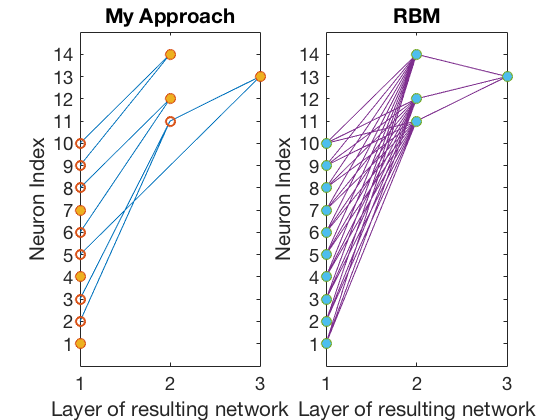

In [25]:
% Load 10-neuron coarse-graining example for comparison with (fully connected) RBM
  subplot(1,2,1)     
  example_10neurons  %10 neurons, coarse-grained over 4 iterations to leave a 6-neuron network over 3 layers

  subplot(1,2,2)
  rbm_10neurons      %Equivalent 3-layer RBM architecture inludes 10+4 nodes, all weights possibly significant

* ### Almost an RBM, but sparse and with skip-layer connections -- for insight into the brain network structure.

* ### Moving backwards, I can reconstruct (sample) data visible units with correct means & pairwise averages.

## Algorithm/Pipeline:

## 1. Prepare the data

### We load data from salamander retina -- say, the first trial out of 297.
### We store the firing trajectories (spike trains) for each of the N=160 neurons.

In [41]:
% Check dimensionality of input data
  size(bint)


ans =

   297   160   953



In [1]:
% CGpipeline_
  close all; clear; clc; %CGpipeline_

 
% Load neural data
  load bint_fishmovie32_100 % Already in binary Matlab format .mat
  n_trials = size(bint,1);  % Number of trials comprising data 3D array "bint"
  timesteps = size(bint,3); % Number of time bins in which neuron activities recorded
  N = size(bint,2);         % Number of neurons for which trajectories were recorded

% Choose small data subset
  choose_trial=1;           % Choose 1st out of n_trials experimental repeats
  data = reshape(bint(choose_trial,:,:),[160,953]);
  data = data*2-1;          % Neuroscience convention 0/1 --> physics -1/+1
  mean(sum(data>0,2)/953);  % Check the value of "p", how many times spiking
  mean(mean(data,2));       % Check the value of <x>, the average firing rate


% How many times do we want to try to coarse-grain this data? 
  CGevents=70;              % Number of desired coarse-graining iterations over which to apply algorithm
  C{1,CGevents+1}=[];       % Pre-allocate empty cell array to contain the coarsened data matrix at each step
  C{1}=data;                % First element of cell array --> assign original data matrix, copied from above


% Begin a new cell array containing the "included" neuron trajectories (which will change)
  for g=1:size(C{1},1)
      c{g}=C{1}(g,:);       %Initalize cell array to keep trajectories for all N visible + CGevents hidden neurons
  end
  D{1}=c;                   %Bigger cell array whose first element is "c", keeps track over iterations
  E{1}=c;
  %masterlist{1}=c;
  incl{1}=1:length(c);      % Initialize list of neurons that should be "included" at each iteration
  incl_origonly{1}=1:length(c);
  %eliminated{1}=[];


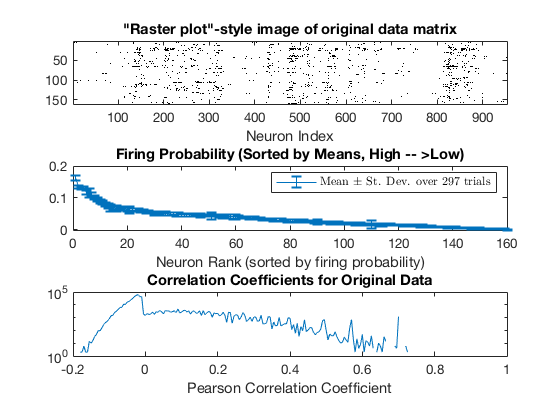

In [35]:
% Baseline Visualizations of Original Data


% "Raster plot"-style image of original data matrix
  subplot(3,1,1)
  imagesc(C{1})
  colormap(flipud(gray))
  title('"Raster plot"-style image of original data matrix')
  xlabel('Neuron Index')


% Data Attributes for mean/std. dev. plot
  [meanz,indz]=sort(mean((mean(bint,3))),'descend');
  varz=var((mean(bint,3)));
  stdz=std((mean(bint,3)));

% Mean and St. Deviation of Individual Firing Rates
  subplot(3,1,2)
  errorbar(1:160,meanz,stdz(indz))
  title('Firing Probability (Sorted by Means, High -- >Low)')
  xlabel('Neuron Rank (sorted by firing probability)')
  %ylabel('Percentage of time bins in which neuron was firing')
  legend('Mean $\pm$ St. Dev. over 297 trials','interpreter','latex')

% Correlations for all pairs of Firing Rates
  subplot(3,1,3)
  u=histogram(corrcoef(C{1}));
  semilogy(u.BinEdges(1:end-1),u.Values)
  title('Correlation Coefficients for Original Data')
  xlabel('Pearson Correlation Coefficient')


## 2. Perform the Coarse-Graining (Dimensionality Reduction)

### Take pair $s_1,s_2$ with highest $cov = \langle s_1 s_2 \rangle - \langle s_1 \rangle \langle s_2 \rangle$; replace with a new  hidden unit $\sigma$ as above.
### These "effective neurons" have their own distribution $P(\sigma)$ which reproduces $\langle s_1 \rangle$, $\langle s_2 \rangle$, and $\langle s_1 s_2\rangle$ by design.
### Do this for  $CGevents$ iterations or until the above assumptions about the distributions are broken ($\rightarrow$ exit loop).

In [3]:
% Main loop

  for k=1:CGevents
    
      %k
    
% Find the most highly correlated neurons:
      [mosthigh,hival]=find_most_highly(data);
      MostHi(k,:)=mosthigh;
      eliminated{k}=incl{k}(mosthigh);

      v1=data(mosthigh(1),:); v2=data(mosthigh(2),:);
      means=[mean(data(mosthigh(1),:)) mean(data(mosthigh(2),:))];
      pairwise=mean(data(mosthigh(1),:).*data(mosthigh(2),:));
      covarnce=pairwise-mean(data(mosthigh(1),:))*mean(data(mosthigh(2),:));
      %[means pairwise covarnce]

% Break the loop if <s_1*s_2> is negative or zero
      if pairwise<=0
          fprintf('Non-positive pairwise correlation')
          k
          CGevents=k-1;
          break   %Violates assumptions; stop here
          broken=1;
      end


% Analytical solution equations
      tanhJ0sqd=means(1)*means(2)/pairwise;
      tanhJ1sqd=means(1)*pairwise/means(2);
      tanhJ2sqd=means(2)*pairwise/means(1);



% Break the loop if any of above is >1
      if sum([tanhJ0sqd tanhJ1sqd tanhJ2sqd]>1)
         fprintf('Error: Component > 1')
         k
         CGevents=k-1;
         break
         broken=1;
      end


% Choose values of couplings (interdependent, from each other)
      J0=atanh(-tanhJ0sqd^.5);                                    % Choose minus root as default
      %J1=atanh(tanhJ1sqd^.5);
      J1=atanh(means(1)/tanh(J0));
      %J2=atanh(tanhJ2sqd^.5);
      J2=atanh(pairwise/tanh(J1));
      %mean(v1)^2+mean(v2)^2
      %[tanhJ0sqd tanhJ1sqd tanhJ2sqd]

% Correlation for current pair -- check
      corry=(pairwise-mean(v1)*mean(v2))/sqrt(var(v1)*var(v2));
      [J0 J1 J2];


%In case any of above didn't catch it...
      if sum((imag([J0 J1 J2]))>0)
          fprintf('Imaginary couplings')
          k
          CGevents=k-1;
          break
          broken=1;
      end


% Propagate to hidden layer and back 

      logistic_through                                             % Calculate sigma from v1,v2; then in reverse
      Meansig(k)=meansig;                                          

      newsigs{k}=samples;

% Save couplings and joint probability distributions

      couplings(k,:)=[J0 J1 J2];
      covthrutime(k)=covarnce;

      JPD_compar(:,:,k)=[[sum((v1+v2)==2) sum((v1==1) & (v2==-1)) sum((v1==-1) & (v2==1)) sum((v1+v2)==-2)]/953; [sum((vis(1,:)+vis(2,:)==2)) sum((vis(1,:)==1) & (vis(2,:)==-1)) sum((vis(1,:)==-1) & (vis(2,:)==1)) sum((vis(1,:)+vis(2,:))==-2)]/953];

% Update the list of neurons to be included in each layer

      c{size(c,2)+1}=samples;

      incl{k+1}=setdiff(1:length(c),cell2mat(eliminated));

      data=cell2mat(c(incl{k+1})');

  end


% After the loop, update which cells to draw from to depict the data at a given stage of coarse-graining:
  incl=incl(1:CGevents);
  eliminated=eliminated(1:CGevents);


% Add details for any error messages:
  if broken
      fprintf(['An error above means that the loop was broken at the indicated coarse-graining step.'...
               '\n Variable CGevents was reverted back to its previous value.'])
  end

Error: Component > 1
k =

    61



## What do the resulting, full-scale models look like?
### Which neurons are remaining (and deleted) after each CG step?

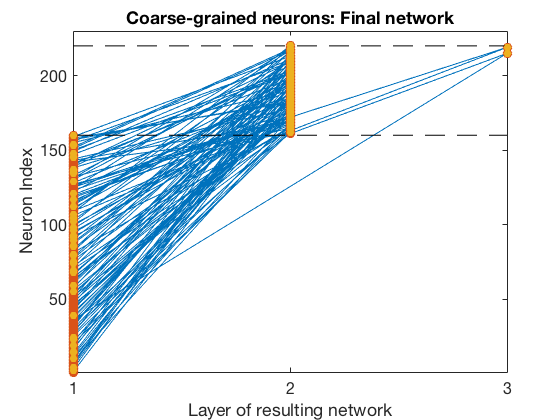

In [27]:
% Visualization: What does the final, hierarchical network product look like?

  visualize_finalproduct % Script that builds network connections between eliminated pairs and added hidden units 

## 3. Reconstruct the data

### Iteration by iteration in reverse, we replace (a copy of) the trajectories for each of the subset of the $CGevents+N$ neurons that were coarse-grained by new trajectories, reconstructed from effective neurons that replaced them.

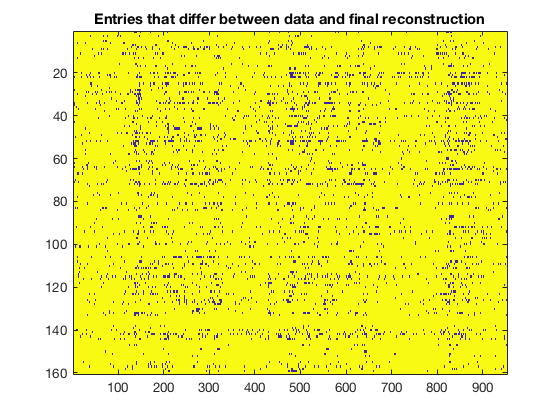

In [8]:
% Copy the array with all neuron trajectories
  r=c;

% Modify the cells in the copied array that were affected
  for k=CGevents:-1:1
    
      %k
      %eliminated{k}

       activ=[r{160+k}; r{160+k}].*couplings(k,2:3)';
       recons=(exp((activ))./(2.*cosh(activ))>rand(2,num_samps))*2-1;
       r(eliminated{k})={recons(1,:),recons(2,:)};

       %Checkpoint
       %sum((sum(cell2mat(c')==cell2mat(r'),2)/953)<1)

  end

% After replacing, show entries that differ (data vs. reconstruction)
  figure
  imagesc(cell2mat(c(1:160)')==cell2mat(r(1:160)'))
  title('Entries that differ between data and final reconstruction')
  %Also, plot "affected rows/cols" of correlation matrices?

  %Can also do:
  %Pick k, see how reconst elements differ from originals
  %imagesc(cell2mat(r(incl{k})')==cell2mat(c(incl{k})'))

## 4. Compute covariance matrixes:

### Are the most highly correlated neurons the same in original, coarsened, and reconstructed matrices?

(Need to define "receptive fields" more precisely. Going to try definition from Mehta and Schwab 2014.)

### Covariance $\mbox{ } cov(s_1,s_2) = \langle s_2 s_2 \rangle - \langle s_1 \rangle  \langle s_2 \rangle $

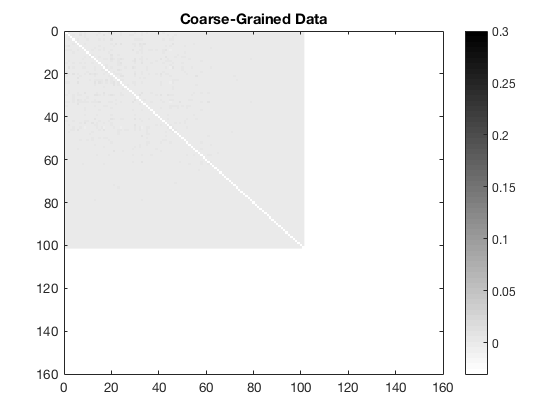

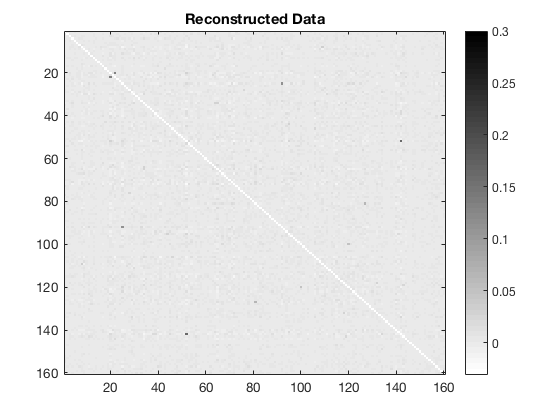

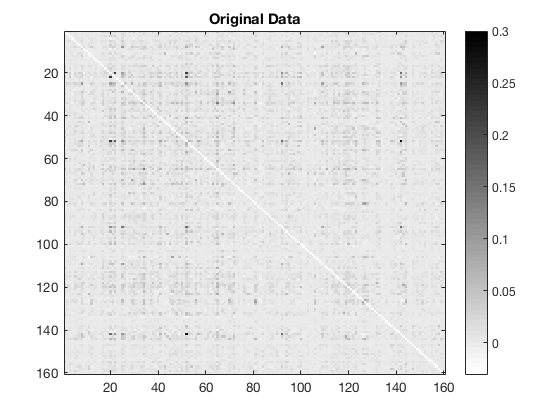

In [7]:
%Compute the various covariance matrixes:
        
    %[covC_raw,covC]=cov_matrix(C{1});
    [covDat_raw,covDat]=cov_matrix(cell2mat(c(incl{1})'));
    [covRec_raw,covRec]=cov_matrix(cell2mat(r(incl{1})'));
    [covCG_raw,covCG]=cov_matrix(cell2mat(c(incl{end})'));
    
    %figure,imagesc(covC); title('Original Data Matrix')
    figure,imagesc(covDat); title('Original Data'); colormap(flipud(gray)); colorbar; caxis([-.03 .3])
    figure,imagesc(covRec); title('Reconstructed Data'); colormap(flipud(gray)); colorbar; caxis([-.03 .3])
    figure,imagesc(covCG); title('Coarse-Grained Data'); colormap(flipud(gray)); colorbar; caxis([-.03 .3])
    xlim([0 160]); ylim([0 160])

## 5. Sanity check: Top 10 most correlated pairs?

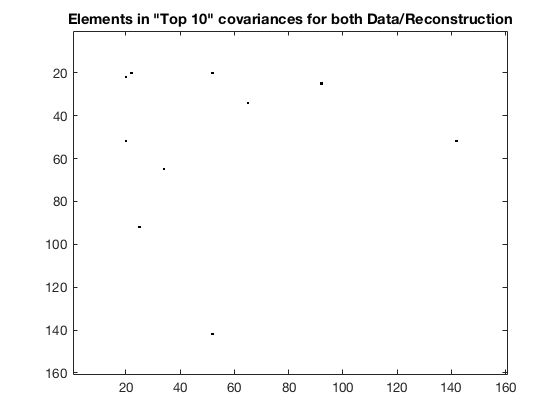

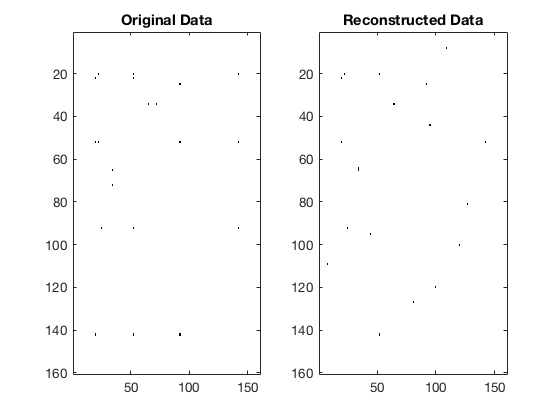

In [11]:
% Find the locations of the TOP 10 most highly correlated in original data, coarse-grained, and final reconstructions
    
    howmanytop=10;  % Top __ covariance entries to find
    
    [covDat_unique indD]=sort(unique(covDat(~isnan(covDat))),'descend');
    covDat_top=covDat_unique(1:howmanytop);
    [rD,cD]=find(ismember(triu(covDat),covDat_top(1:howmanytop)));
    
    [covRec_unique]=sort(unique(covRec(~isnan(covRec))),'descend');
    covRec_top=covRec_unique(1:howmanytop);
    [rR,cR]=find(ismember(triu(covRec),covRec_unique(1:howmanytop)));

    
    % Lists of top entries and locations
    
      for topindsD=1:howmanytop
          topsD(topindsD)=covDat(rD(topindsD),cD(topindsD));
      end
          [topsD,indsD]=sort(topsD','descend');
          rD=rD(indsD); cD=cD(indsD);
    
      for topindsR=1:howmanytop
          topsR(topindsR)=covDat(rR(topindsR),cR(topindsR));
      end
          [topsR,indsR]=sort(topsR','descend');
          rR=rR(indsR); cR=cR(indsR);
    
    
         
    % Side-by-side plot of top cov's for original data vs. recons
      figure
      subplot(1,2,1)
      imagesc(covDat>=covDat_top(end)); colormap(flipud(gray));
      title('Original Data')
      subplot(1,2,2)
      imagesc(covRec>=covRec_top(end)); colormap(flipud(gray));
      title('Reconstructed Data')
      %Can also add covCG...
    
    % Elements in Top 10 for both Data and Reconstruction matrices
    % figure,imagesc(covRec>=covRec_top(end) == covDat>=covDat_top(end)); colormap(flipud(gray));
      figure,imagesc(((covRec>=covRec_top(end)) + (covDat>=covDat_top(end)))==2); colormap(flipud(gray));
      title('Elements in "Top 10" covariances for both Data/Reconstruction')

## 6. Average reconstruction error for JPD over {(1,1) (1,-1) (-1,1) (-1,-1)}
### Can view any value of $k$ from $1:CGevents$; here k=1 is just an example...

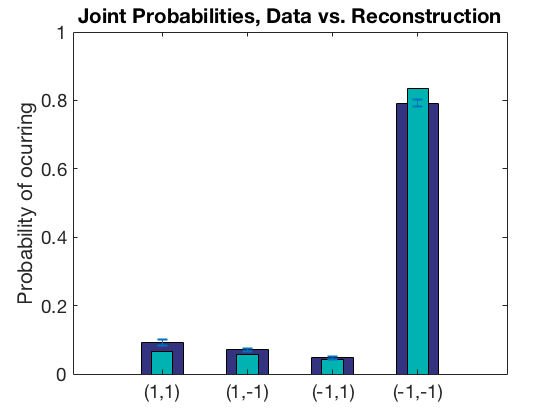

In [24]:
% Joint probability distributions w/ error bars showing the mean difference between reconstruction and original data
  k=1;
  bar(mean(JPD_compar(1,:,k),3),0.5,'FaceColor',[0.2 0.2 0.5]); hold on; bar(mean(JPD_compar(2,:,k),3),.25,'FaceColor',[0 0.7 0.7])
  errorbar(mean(JPD_compar(1,:,k),3),mean(abs(JPD_compar(1,:,:)-JPD_compar(2,:,:)),3),'LineStyle','none','MarkerSize', 20)
  % Can also check any other value of k
  xticknames = {'(1,1)'; '(1,-1)'; '(-1,1)'; '(-1,-1)'};
  set(gca,'xtick',[1:4],'xticklabel',xticknames,'FontSize',14)
  ylabel('Probability of ocurring')
  title('Joint Probabilities, Data vs. Reconstruction')

## Mutual Information: How well did we do?

	
   
* ### We have focused on 1st- and 2nd-order statistics.
	
* ### How well does this recover higher-order correlations?


In [8]:
% MI for Original Data

  for m=1:N
  for n=1:N
      data=C{1}([m n],:)';
      MI_Dat_raw(m,n)=mutual_stats(data);
  end
  end

% MI for Original Data
  Recmat=cell2mat(r(incl{1})');

  for m=1:N
  for n=1:N
      data=Recmat([m n],:)';
      MI_Rec_raw(m,n)=mutual_stats(data);
  end
  end
  
 
 
% Check avg. values:
  %mean(mean(MI_Dat_raw))
  %mean(mean(MI_Rec_raw))

## Mutual information comparison plots ("data with data" vs. "data with reconstruction")

Again, the idea is to see how well matching the means/pairwise stats recover the information about higher-order interactions.

I have thought about, and made other plots with, "benchmarks" against which to compare -- for example, how about plotting another scatter for the MI values that would be estimated using the sample method for 160 independent Bernoulli variables that have the same means as the reconstructed spins? Let me know.

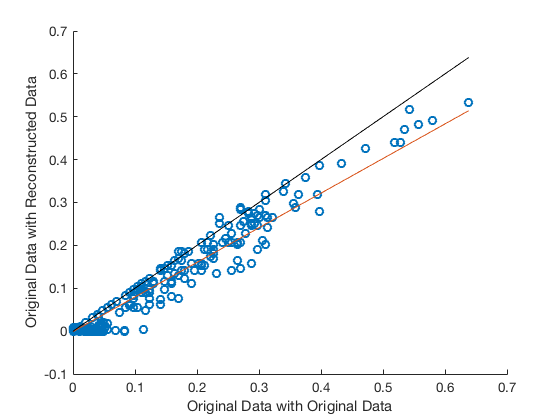

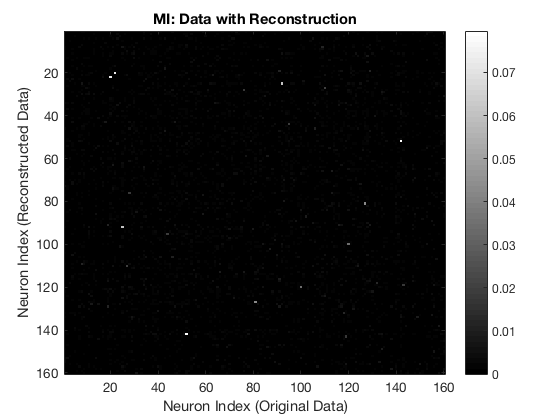

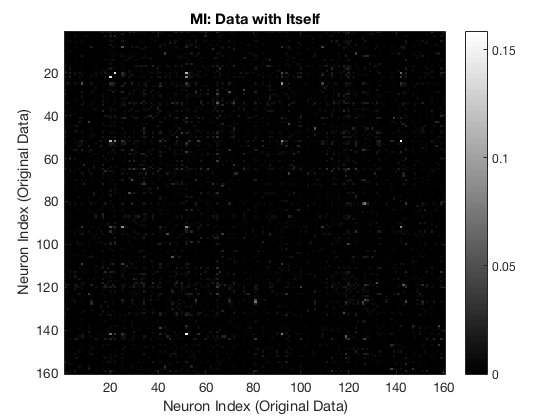

In [17]:
% With main diagonal:
  %figure,imagesc(MI_Dat_raw); title('MI: Data with Itself'); colormap(gray); colorbar
  %figure,imagesc(MI_Rec_raw); title('MI: Data with Reconstruction'); colormap(gray); colorbar
  
% Without main diagonal:
  MI_Dat=MI_Dat_raw.*(diag(ones(1,size(MI_Dat,1))*nan)+1);
  MI_Rec=MI_Rec_raw.*(diag(ones(1,size(MI_Rec,1))*nan)+1);

  figure,imagesc(MI_Dat); title('MI: Data with Itself'); colormap(gray); colorbar
    xlabel('Neuron Index (Original Data)')
    ylabel('Neuron Index (Original Data)')
  figure,imagesc(MI_Rec); title('MI: Data with Reconstruction'); colormap(gray); colorbar
    xlabel('Neuron Index (Original Data)')
    ylabel('Neuron Index (Reconstructed Data)')
 
  figure,scatter(MI_Dat_raw(:),MI_Rec_raw(:))
  hold on
  linfit=polyfit(MI_Dat_raw(:),MI_Rec_raw(:),1);
  yfitvals=polyval(linfit,MI_Dat_raw(:));
  plot(MI_Dat_raw(:),yfitvals);
  plot(MI_Dat_raw(:),MI_Dat_raw(:),'k')
  xlabel('Original Data with Original Data')
  ylabel('Original Data with Reconstructed Data')
  hold off